## Matrices Operations and Linear Regression

Suggestion: explore the NumPy library documentation to find the right functions to solve the exercises below

NumPy docs: https://numpy.org/doc/stable/

## Setup

In [2]:
import numpy as np  # This should be all the dependencies you will need

### 1.1 Matrix Element Wise-multiplication

Consider the two following matrices 

$$
A = \begin{pmatrix}
1&0&0\\
0&1&0\\
0&0&1\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2&3\\
4&5&6\\
7&8&9\\
\end{pmatrix}
$$

Write a Python program that computes the element-wise multiplication of the two matrices, i.e.

$$
C = \begin{pmatrix}
1&0&0\\
0&5&0\\
0&0&9\\
\end{pmatrix}
$$

In [5]:
## write your code here

a = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(3, 3)
print(a)

b = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3, 3)
print(b)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
a*b

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

### 1.2 Matrix-Matrix Multiplication

Consider the following two matrices

$$
A = \begin{pmatrix}
2&1&3\\
1&1&2\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2\\
5&6\\
7&9\\
\end{pmatrix}
$$

Write a Python program that computes the matrix multiplication of the two matrices, i.e.

$$
C = A \times B = \begin{pmatrix}
28&37\\
20&26\\
\end{pmatrix}
$$
Run the same program for the matrices of Exercise 1.1. Which result do you get?

In [9]:
## write your code here
a = np.array([2,1,3,1,1,2]).reshape(2,3)
print(a)

b = np.array([1,2,5,6,7,9]).reshape(3,2)
print(b)

[[2 1 3]
 [1 1 2]]
[[1 2]
 [5 6]
 [7 9]]


Dot product multiplication is used for matrixs of different sizes

In [14]:
np.dot(a,b)

array([[28, 37],
       [20, 26]])

In [12]:
np.matmul(a,b)

array([[28, 37],
       [20, 26]])

In [13]:
a@b

array([[28, 37],
       [20, 26]])

### 1.3 Linear Regression

We generate some fake "height" and "weight" data about babies between 0 and 12 months of age.

We  want to create  linear predictor that predicts the weight from the baby age (in month).

In [15]:
# generate some fake "height" and "weight" data about babies between 0 and 12 months of age
babies = range(10)
months = np.arange(12)
data = [(month + np.random.rand(), np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]
# Let's put the month_data into the matrix X together with the biases column vector
X_1 = np.array(month_data)    # here we put month_data into a row vector called X_1
X_0 = np.ones([X_1.shape[0], 1]) # this is the biases column vector
X_1 = X_1[:, np.newaxis]    # here we convert X_1 from a row vector to a column vector
X = np.concatenate((X_0, X_1), axis=1) # here we concatenate the biases vector to the month_data vector

# Let's put the weight_data into the output vector y
y = np.array(weight_data)

In [16]:
X.ndim, y.ndim

(2, 1)

In [17]:
X.shape, y.shape

((120, 2), (120,))

Our features matrix $X$ as a column of biases (all set to 1) and our column of input features (i.e age).

Our labels verctor $y$ is a row vector with our output labels (weights in some unspecified unit)

In [24]:
X[6:12]

array([[1.        , 0.73290435],
       [1.        , 0.05501597],
       [1.        , 0.03938074],
       [1.        , 0.17100943],
       [1.        , 1.27125607],
       [1.        , 1.37824322]])

In [26]:
y[10:15] #contains weight data which is one column

array([121.48683513, 114.76440454, 113.62879067, 147.99608399,
       116.8253734 ])

Given: 
- the two-dimensional array (i.e. a matrix) $X$, containing a column with biases (all set to 1) and a column containing the ages of children (expressed in months)
- a one dimensional column array $y$ containing the weights of the same children expressed in kilograms
Write a function to compute the best fit  using the Linear Regression model with Ordinary Least Squares Method:
$$
\beta = (X^T X)^{-1}X^T y
$$
where, given a matrix $A$, $A^T$ is the transpose matrix of A, and $A^{-1}$ is the inverse matrix of $A$.


The $X$ and $y$ arrays have precomputed for you in the cell above

In [29]:
# Hint: check the NumPy documentation to find the functions to compute the transpose and the inverse of a matrix
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    xtx = np.dot(X.T, X)
    inv_xtx = np.linalg.inv(xtx) 
    xty = np.dot(X.T, y)
    return np.dot(inv_xtx, xty) #beta

Once you function has been written, you should be able to run the code below:

In [32]:
params

array([85.26010753, 24.5790061 ])

In [30]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 85.26010752848285 | slope: 24.579006096037734


You should also be able to visualize the result of the OLS fitting running the code in the cell below:

Text(0, 0.5, 'Weight (?)')

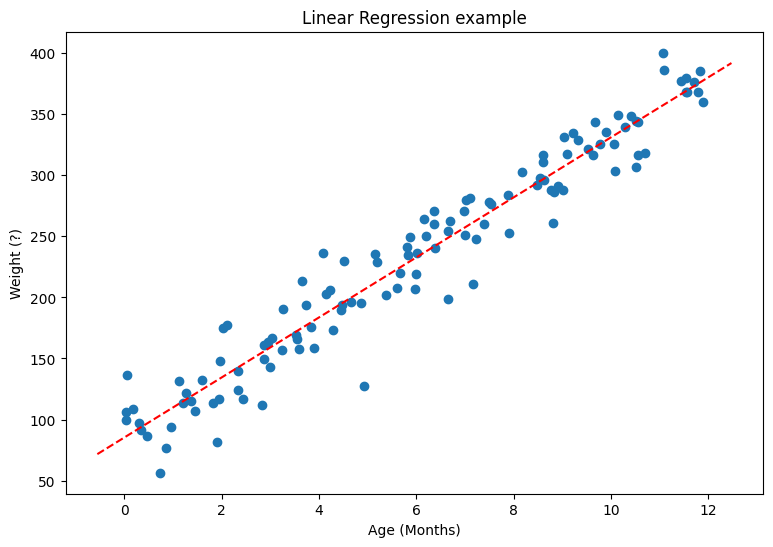

In [31]:
## here we draw a graph of the linear estimator
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(9, 6))
axes.scatter(month_data, weight_data) #scatter plot
x_vals = np.array(axes.get_xlim())
y_vals = params[0] + params[1] * x_vals #regression line
axes.plot(x_vals, y_vals, 'r--')
plt.title('Linear Regression example')
plt.xlabel('Age (Months)')
plt.ylabel('Weight (?)')